# Objective:
Create a simpy model that has 3 sequential steps 

In [1]:
import simpy
import pandas as pd
import pm4py

In [2]:
log_list = []

In [3]:
env = simpy.Environment() 
process_A_resource = simpy.Resource(env, capacity = 1)
process_B_resource = simpy.Resource(env, capacity = 1)
process_C_resource = simpy.Resource(env, capacity = 1)

In [4]:
def process_A (entity,env):
    
    with process_A_resource.request() as request:
        yield request
        yield env.timeout(2)
        #print('process A happend')
        log_list.append([entity, env.now, 'process_A' ])

In [5]:
def process_B(entity,env):
    with process_B_resource.request() as request:
        yield request
        yield env.timeout(2)
       # print('process B happend')
        log_list.append([entity, env.now, 'process_B' ])

In [6]:
def process_C(entity,env):
    with process_C_resource.request() as request:
        yield request
        yield env.timeout(2)
       # print('process C happend')
        log_list.append([entity, env.now, 'process_C' ])

In [7]:
def run_definition(env):
    entity = 1
   
    while env.now < 20:
        entity += 1
        yield env.timeout(2)
        env.process(process_A(entity,env))
        env.process(process_B(entity,env))
        env.process(process_C(entity,env))
      

In [8]:
env.process(run_definition(env))
env.run(90)

# New_seq_process

In [21]:
class process_scenario():
    
    def __init__(self)
        self.env = simpy.Environment() 
        self.process_A_resource = simpy.Resource(env, capacity = 1)
        self.process_B_resource = simpy.Resource(env, capacity = 1)
        self.process_C_resource = simpy.Resource(env, capacity = 1)
    
    def process_A:
        yield env.timeout(2)
    
    def process_B
        yield env.timeout(2)
    
    def process_C
        yield env.timeout(2)
    
    

In [22]:
log_list = []

In [23]:
def new_test_process(entity,env):
    with process_A_resource.request() as request:
        yield request
        
        #print('process A happend')
        log_list.append([entity, env.now, 'process_A' ])
        
    with process_B_resource.request() as request:
        yield request
        
       # print('process B happend')
        log_list.append([entity, env.now, 'process_B' ])  
        
    with process_C_resource.request() as request:
        yield request
        
       # print('process C happend')
        log_list.append([entity, env.now, 'process_C' ])

In [24]:
def run_definition_new(env):
    entity = 1
   
    while env.now < 20:
        entity += 1
        yield env.timeout(2)
        env.process(new_test_process(entity,env))
      

In [25]:
env.process(run_definition_new(env))
env.run(90)

# Process mining

In [26]:
log = pd.DataFrame(log_list, columns = ['entity' , 'event_time', 'activity'])

In [27]:
log.to_csv('../outputs/seq_log.csv' )

In [28]:
log_pm = pm4py.format_dataframe(log, case_id = 'entity', activity_key = 'activity', timestamp_key = 'event_time')

In [29]:
process_mode = pm4py.discover_bpmn_inductive(log_pm)

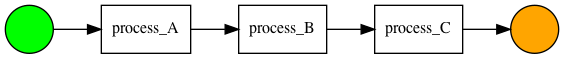

In [30]:
pm4py.view_bpmn(process_mode)

In [31]:
log

,entity,event_time,activity
0,2,4,process_A
1,2,6,process_B
2,3,6,process_A
3,2,8,process_C
4,3,8,process_B
5,4,8,process_A
6,3,10,process_C
7,4,10,process_B
8,5,10,process_A
9,4,12,process_C
